# Linear Regression (Botswana)

In this code, we use linear regression on the analytical forms of the Green Solow model to find its parameters. We show that the parameters found using linear regression are not consistent, and each analytical equation gives different/ conflicting parameters. 

In [1]:
# #generating the environment, this has to be done the first time this code is run
# using Pkg
# Pkg.generate("regression_Y")

# Pkg.add("ModelingToolkit")
# Pkg.add("OrdinaryDiffEq")
# Pkg.add("LinearAlgebra")
# Pkg.add("Plots")
# Pkg.add("StatsModels")
# Pkg.add("Plots")
# Pkg.add("DataFrames")
# Pkg.add("CSV")
# Pkg.add("GLM")
# Pkg.add("Statistics")
# Pkg.add("Flux")
# Pkg.add("StatsBase")

In [2]:
println(@__DIR__)
using Pkg
# Pkg.status()
# Pkg.instantiate()
Pkg.activate(string(@__DIR__, "/regression_Y/"))
Pkg.status()

/home/ziyu/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Model -1 Analytical Solution Regression


 Activating environment at `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Model -1 Analytical Solution Regression/regression_Y/Project.toml`


Project regression_Y v0.1.0
Status `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Model -1 Analytical Solution Regression/regression_Y/Project.toml`
  [336ed68f] CSV v0.8.4
  [a93c6f00] DataFrames v0.22.5
  [587475ba] Flux v0.11.1
  [38e38edf] GLM v1.4.0
  [961ee093] ModelingToolkit v5.10.1
  [1dea7af3] OrdinaryDiffEq v5.51.1
  [91a5bcdd] Plots v1.6.12
  [2913bbd2] StatsBase v0.33.3
  [3eaba693] StatsModels v0.6.21
  [37e2e46d] LinearAlgebra 
  [10745b16] Statistics 


In [3]:
using ModelingToolkit
using OrdinaryDiffEq
using LinearAlgebra
using Statistics
using Flux
using StatsBase
using DataFrames
# using Plots

# Importing data

In [4]:
using CSV
raw_data = CSV.read(string(@__DIR__,"/compileddf.csv"),normalizenames = true, DataFrame)

,Year,Albania_et,Albania_yt,Albania_Popt,Albania_nt,Albania_Ktotal,Albania_kt
,Int64,Float64?,Float64?,Float64,Float64?,Float64?,Float64?
1,1959,missing,missing,1.57133e6,missing,missing,missing
2,1960,1.25819,0.001451,1.62311e6,0.0329562,missing,missing
3,1961,1.37419,0.001463,1.67664e6,0.0329743,missing,missing
4,1962,1.43996,0.001511,1.72814e6,0.0307175,missing,missing
5,1963,1.18168,0.001563,1.77972e6,0.029846,missing,missing
6,1964,1.11174,0.001616,1.83228e6,0.0295379,missing,missing
7,1965,1.1661,0.001675,1.88365e6,0.028035,missing,missing
8,1966,1.33306,0.001738,1.93296e6,0.0261784,missing,missing
9,1967,1.36375,0.001804,1.98406e6,0.0264345,missing,missing


In [5]:
# for USA

USA_raw = raw_data[:, ["United_States_kt", "United_States_et", "United_States_yt", "United_States_nt"]]
delete!(USA_raw, 1:10)
USA_raw[!,:t] = 1:40

USA_y_reg = USA_raw[:,[1,3,2,5]]
DataFrames.rename!(USA_y_reg, [:k, :y, :e, :t])
USA_y_reg = USA_y_reg[2:end,:]

USA_y_reg[!, :yty0] = USA_y_reg[!, :y]/USA_y_reg[!, :y][1]
USA_y_reg[!, :lgyty0] = log.(USA_y_reg[!, :yty0])
USA_y_reg[!, :ktk0] = USA_y_reg[!, :k]/USA_y_reg[!, :k][1]
USA_y_reg[!, :lgktk0] = log.(USA_y_reg[!, :ktk0])
USA_y_reg

,k,y,e,t,yty0,lgyty0,ktk0,lgktk0
,Float64,Float64?,Float64?,Int64,Float64,Float64,Float64,Float64
1,0.0632449,0.01503,21.1113,2,1.0,0.0,1.0,0.0
2,0.0651057,0.015304,20.9802,3,1.01823,0.018066,1.02942,0.0289973
3,0.067476,0.015944,21.7486,4,1.06081,0.0590344,1.0669,0.0647568
4,0.0706719,0.016689,22.5106,5,1.11038,0.104702,1.11743,0.111033
5,0.0743356,0.016491,21.5029,6,1.09721,0.0927666,1.17536,0.161575
6,0.0764952,0.016284,20.4022,7,1.08343,0.0801348,1.20951,0.190214
7,0.0777832,0.016975,21.1576,8,1.12941,0.121693,1.22987,0.20691
8,0.0809296,0.017567,21.5325,9,1.1688,0.155974,1.27962,0.246565
9,0.0851758,0.018373,21.973,10,1.22242,0.200834,1.34676,0.297702


## Parameters for the equation for y(t)

Start by regressing the equation for $y(t)$. To regress the following equation, the analytical solution of the Green Solow Model equation:

$\frac{y(t)}{y(0)} = \frac{k(t)^\alpha}{k(0)^\alpha} \times e^{g_B \times t} = \left(\frac{k(t)}{k(0)}\right)^\alpha \times e^{g_B \times t}$

Can take the log of both sides to get:

$\log\left(\frac{y(t)}{y(0)}\right) = \alpha \log\left(\frac{k(t)}{k(0)}\right) + g_B\times t$

In [6]:
using GLM

#regression of USA y data
ols_y_USA = lm(@formula(lgyty0 ~ lgktk0 + t), USA_y_reg)



StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

lgyty0 ~ 1 + lgktk0 + t

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0245329   0.00779418  -3.15    0.0033  -0.0403402  -0.00872552
lgktk0        0.00126064  0.0705531    0.02    0.9858  -0.141828    0.144349
t             0.0197244   0.00156593  12.60    <1e-14   0.0165486   0.0229003
──────────────────────────────────────────────────────────────────────────────

Note that the value of $\alpha$ can be found through this regression, via the coefficient for $log\frac{k(t)}{k(0)}$

In [7]:
#returns the coefficients, which are the values of $\alpha$ and $g_B$

USA_alpha = coef(ols_y_USA)[2]
USA_gB = coef(ols_y_USA)[3]

println("alpha is ", USA_alpha)
println("gB is ", USA_gB)

alpha is 0.0012606403056080499
gB is 0.019724449042539376


## Parameters for the equation for e(t)

Regressing the equation for $e(t)$. To regress the following equation, the analytical solution of the Green Solow Model equation:

\begin{gather}
    \frac{e(t)}{e(0)} 
    = \left( \frac{k(t)}{k(0)}\right)^\alpha \times e^{(g_B -g_A) \times t}
\end{gather}
    
Can take the log of both sides to get:

$\log\left(\frac{e(t)}{e(0)}\right) = \alpha \log\left(\frac{k(t)}{k(0)}\right) + (g_B-g_A)\times t$

In [8]:
USA_raw[!,:t] = 1:40
USA_e_reg = USA_raw[:,[1,3,2,5]]
DataFrames.rename!(USA_e_reg, [:k, :y, :e, :t])
USA_e_reg = USA_e_reg[2:end,:]

USA_e_reg[!, :ete0] = USA_e_reg[!, :e]/USA_y_reg[!, :e][1]
USA_e_reg[!, :lgete0] = log.(USA_e_reg[!, :ete0])
USA_e_reg[!, :ktk0] = USA_e_reg[!, :k]/USA_e_reg[!, :k][1]
USA_e_reg[!, :lgktk0] = log.(USA_e_reg[!, :ktk0])
# print(USA_y_reg)

ols_e_USA = lm(@formula(lgete0 ~ lgktk0 + t), USA_e_reg)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

lgete0 ~ 1 + lgktk0 + t

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00689264  0.0144505    0.48    0.6363  -0.0224143   0.0361996
lgktk0       -0.136058    0.130806    -1.04    0.3052  -0.401345    0.129229
t             5.92741e-5  0.00290324   0.02    0.9838  -0.00582877  0.00594732
──────────────────────────────────────────────────────────────────────────────

Upon observation, we can see that the values for $\alpha$ already differ among these two regessions.

In [9]:
# #calculating the variance and standard errors
# X = Array{Float64}(undef, 39, 3).+1
# Y = Array{Float64}(undef, 39, 1)
# Y[:,1] = USA_e_reg[!, :lgete0]
# X[:,2] = USA_e_reg[!, :lgktk0]
# X[:,3] = USA_e_reg[!, :t]
# beta = [0.00689264; -0.136058; 0.0000592741]
# MSE = norm(Y-X*beta, 2)^2
# variance = MSE.* inv(transpose(X)*X)
# standard_errors = Array{Float64}(undef, 1, 3) 
# standard_errors = sqrt.([variance[1,1], variance[2,2], variance[3,3]]./(39-3))

## Parameters for the equation for k(t)


\begin{equation}
    k(t) = (\frac{\frac{(1-\alpha)\times s\times y(0)}{k(0)^\alpha} \times \frac{e^{(1-\alpha)\times (\delta+n+g_B)\times t + g_B \times t}}{(1-\alpha)\times (\delta+n+g_B) + g_B } +C}{e^{(1-\alpha)\times (\delta +n+g_B)\times t }})^\frac{1}{1-\alpha}
\end{equation}
Where:
\begin{equation}
    C = k(0)^{1-\alpha} - \frac{(1-\alpha)\times s\times y(0)}{{k(0)^\alpha}\times((1-\alpha)\times (\delta+n+g_B) + g_B )}
\end{equation}

We can simplify the equation to: 
\begin{equation}
    k(t) ^ {(1-\alpha)}= \frac{(1-\alpha)\times s\times y(0)}{k(0)^\alpha \times ((1-\alpha)\times (\delta+n+g_B) + g_B )}  \times e^{g_B \times t} +C\times {e^{(\alpha-1)\times (\delta +n+g_B)\times t }}
\end{equation}

Which is equivalent to:
\begin{equation}
    k(t) ^ {(1-\alpha)}= \frac{(1-\alpha)\times s\times y(0)}{k(0)^\alpha \times ((1-\alpha)\times (\delta+n+g_B) + g_B )}  \times e^{g_B \times t} +(k(0)^{1-\alpha} - \frac{(1-\alpha)\times s\times y(0)}{{k(0)^\alpha}\times((1-\alpha)\times (\delta+n+g_B) + g_B )})\times {e^{(\alpha-1)\times (\delta +n+g_B)\times t }}
\end{equation}


Finding of coefficients based on:
https://math.stackexchange.com/questions/2249200/exponential-regression-with-two-terms-and-constraints
https://scikit-guess.readthedocs.io/en/latest/_downloads/4cd313a50f7e08ab81758ce0bd661bc3/Regressions-et-equations-integrales.pdf

In [10]:
function regression_system(dataframe)
regression_system_matrix = zeros(5,5)

regression_system_matrix[1,1] = sum(dataframe[:, :SSk].^2)
regression_system_matrix[1,2] = sum(dataframe[:, :SSk].*dataframe[:, :Sk])
regression_system_matrix[1,3] = sum(dataframe[:, :SSk].*dataframe[:, :t].^2)
regression_system_matrix[1,4] = sum(dataframe[:, :SSk].*dataframe[:, :t])
regression_system_matrix[1,5] = sum(dataframe[:, :SSk])

regression_system_matrix[2,1] = regression_system_matrix[1,2]
regression_system_matrix[2,2] = sum(dataframe[:, :Sk].^2)
regression_system_matrix[2,3] = sum(dataframe[:, :Sk].*dataframe[:, :t].^2)
regression_system_matrix[2,4] = sum(dataframe[:, :Sk].*dataframe[:, :t])
regression_system_matrix[2,5] = sum(dataframe[:, :Sk])

regression_system_matrix[3,1] = sum(dataframe[:, :SSk].*dataframe[:, :t].^2)
regression_system_matrix[3,2] = sum(dataframe[:, :Sk].*dataframe[:, :t].^2)
regression_system_matrix[3,3] = sum(dataframe[:, :t].^4)
regression_system_matrix[3,4] = sum(dataframe[:, :t].^3)
regression_system_matrix[3,5] = sum(dataframe[:, :t].^2)

regression_system_matrix[4,1] = sum(dataframe[:, :SSk].*dataframe[:, :t])
regression_system_matrix[4,2] = sum(dataframe[:, :Sk].*dataframe[:, :t])
regression_system_matrix[4,3] = sum(dataframe[:, :t].^3)
regression_system_matrix[4,4] = sum(dataframe[:, :t].^2)
regression_system_matrix[4,5] = sum(dataframe[:, :t].^1)

regression_system_matrix[5,1] = sum(dataframe[:, :SSk])
regression_system_matrix[5,2] = sum(dataframe[:, :Sk])
regression_system_matrix[5,3] = sum(dataframe[:, :t].^2)
regression_system_matrix[5,4] = sum(dataframe[:, :t].^1)
regression_system_matrix[5,5] = length(dataframe[:, :t])
# print(regression_system_matrix)

regression_system_vector = zeros(5,1)
regression_system_vector[1] = sum(dataframe[:, :SSk].*dataframe[:, :kalpha])
regression_system_vector[2] = sum(dataframe[:, :Sk].*dataframe[:, :kalpha])
regression_system_vector[3] = sum(dataframe[:, :kalpha].*dataframe[:, :t].^2)
regression_system_vector[4] = sum(dataframe[:, :kalpha].*dataframe[:, :t].^1)
regression_system_vector[5] = sum(dataframe[:, :kalpha])
# print(regression_system_vector)

ABCDE = inv(regression_system_matrix) * regression_system_vector
# print(ABCDE)
A = ABCDE[1]
B = ABCDE[2]
    
return A, B, regression_system_matrix, regression_system_vector
end

regression_system (generic function with 1 method)

In [11]:
function unrelated_coefficients(dataframe,p ,q)
unrelated_coefficient_matrix = zeros(3,3)

unrelated_coefficient_matrix[1,1] = length(dataframe[:, :t])
unrelated_coefficient_matrix[1,2] = sum(exp.(p.*dataframe[:, :t]))
unrelated_coefficient_matrix[1,3] = sum(exp.(q.*dataframe[:, :t]))

unrelated_coefficient_matrix[2,1] = sum(exp.(p.*dataframe[:, :t]))
unrelated_coefficient_matrix[2,2] = sum(exp.(2*p.*dataframe[:, :t]))
unrelated_coefficient_matrix[2,3] = sum(exp.((p+q).*dataframe[:, :t]))

unrelated_coefficient_matrix[3,1] = sum(exp.(q*dataframe[:, :t]))
unrelated_coefficient_matrix[3,2] = sum(exp.((p+q).*dataframe[:, :t]))
unrelated_coefficient_matrix[3,3] = sum(exp.(2*q.*dataframe[:, :t]))
# print(unrelated_coefficient_matrix)

unrelated_coefficient_vector = zeros(3,1)
unrelated_coefficient_vector[1] = sum(dataframe[:, :kalpha])
unrelated_coefficient_vector[2] = sum(dataframe[:, :kalpha].*exp.(p.*dataframe[:, :t]))
unrelated_coefficient_vector[3] = sum(dataframe[:, :kalpha].*exp.(q.*dataframe[:, :t]))
# print(unrelated_coefficient_vector)

abc = inv(unrelated_coefficient_matrix) * unrelated_coefficient_vector
a,b,c = abc
return a,b,c, unrelated_coefficient_matrix, unrelated_coefficient_vector
end

unrelated_coefficients (generic function with 1 method)

Proceed with regression for k

We solve for a,b,c,p,q to get the regression equation: 

\begin{equation}
    y = k(t) ^{1-\alpha} = a +b\times e ^{p \times t} +c \times e ^{q \times t} 
\end{equation}

Therefore we solve for k(t):
$k(t) = y^\frac{1}{1-\alpha}$


In [12]:
USA_k_reg = USA_raw[:,[1,5]]
DataFrames.rename!(USA_k_reg, [:k, :t])
USA_k_reg = USA_k_reg[2:end,:]

USA_k_reg[!, :kalpha] = USA_k_reg[!,:k].^(1-USA_alpha) #already sorted in increasing order of k and t

USA_k_reg[!, :Sk] = convert(UnitRange{Float64},0:(size(USA_k_reg[!,:k])[1]-1))
USA_k_reg[!, :SSk] = convert(UnitRange{Float64},0:(size(USA_k_reg[!,:k])[1]-1))

for i in 1:(size(USA_k_reg[!,:k])[1]-1)
    USA_k_reg[i+1, :Sk] = USA_k_reg[i, :Sk] + 0.5*(USA_k_reg[i+1, :kalpha]+USA_k_reg[i, :kalpha])*(USA_k_reg[i+1, :t]-USA_k_reg[i, :t])
    USA_k_reg[i+1, :SSk] = USA_k_reg[i, :SSk] + 0.5*(USA_k_reg[i+1, :Sk]+USA_k_reg[i, :Sk])*(USA_k_reg[i+1, :t]-USA_k_reg[i, :t])
end
# last(USA_k_reg,5)

USA_A,USA_B,USA_regression_system_matrix,USA_regression_system_vector = regression_system(USA_k_reg)

USA_p = 0.5(USA_B+sqrt(USA_B^2+4*USA_A))
USA_q = 0.5(USA_B-sqrt(USA_B^2+4*USA_A))
print(" p = ", USA_p,"\n q = ",USA_q)

USA_a,USA_b,USA_c,USA_unrelated_coefficient_matrix,USA_unrelated_coefficient_vector = unrelated_coefficients(USA_k_reg, USA_p, USA_q)
print("\n a = ", USA_a,"\n b = ",USA_b, "\n c = ",USA_c)

#solving for predicted values of k
USA_k_reg[!,:k_pred] = (USA_a .+ USA_b .* exp.(USA_p.*USA_k_reg[!,:t]) .+ USA_c .* exp.(USA_q.*USA_k_reg[!,:t])).^(1/(1-USA_alpha))
USA_k_reg

 p = 0.12426465648334557
 q = -0.1121990327546415
 a = 0.10164676326837592
 b = 0.0004884705570055945
 c = -0.05278388438077906

,k,t,kalpha,Sk,SSk,k_pred
,Float64,Int64,Float64,Float64,Float64,Float64
1,0.0632449,2,0.0634654,0.0,0.0,0.059886
2,0.0651057,3,0.0653303,0.0643979,0.0321989,0.0644347
3,0.067476,4,0.0677057,0.130916,0.129856,0.0685208
4,0.0706719,5,0.0709083,0.200223,0.295425,0.0721957
5,0.0743356,6,0.0745795,0.272967,0.53202,0.0755062
6,0.0764952,7,0.0767435,0.348628,0.842818,0.078494
7,0.0777832,8,0.078034,0.426017,1.23014,0.0811973
8,0.0809296,9,0.0811865,0.505627,1.69596,0.0836505
9,0.0851758,10,0.0854407,0.588941,2.24325,0.0858849


In [13]:
print(ols_y_USA)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

lgyty0 ~ 1 + lgktk0 + t

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0245329   0.00779418  -3.15    0.0033  -0.0403402  -0.00872552
lgktk0        0.00126064  0.0705531    0.02    0.9858  -0.141828    0.144349
t             0.0197244   0.00156593  12.60    <1e-14   0.0165486   0.0229003
──────────────────────────────────────────────────────────────────────────────

The simplest value to compare is to $g_B$ from the regression of $y(t)$, which should correspond to $p$ in the regression of $k(t)$. These values do not match.

# Fitting of values using linear regression

Using each linear regression to regenerate the values of k(t), y(t) and e(t) from initial conditions, we find that the regressions actually fit the data well despite the regression coefficients/ Green Solow model parameters being inconsistent between equations. This suggests that it may be difficult to fit all three equations with constant and consistent parameters. 

In [14]:
print(mean(USA_raw[!, "United_States_nt"]))

0.010453575379948777

In [15]:
USA_pred = USA_k_reg[:,[1,2]]
DataFrames.rename!(USA_pred, [:k,:t])
USA_pred[:,:k_pred] = USA_k_reg[!,:k_pred]



USA_pred[!,:y_pred] = USA_y_reg[1,:y].*exp.(coef(ols_y_USA)[2]*log.(USA_k_reg[!,:k_pred]./USA_k_reg[1,:k_pred]) 
            .+ coef(ols_y_USA)[1]
            .+ coef(ols_y_USA)[3].*USA_k_reg[!,:t])

USA_pred[!,:e_pred] = USA_e_reg[1,:e].*exp.(coef(ols_e_USA)[2]*log.(USA_k_reg[!,:k_pred]./USA_k_reg[1,:k_pred]) 
            .+ coef(ols_e_USA)[1]
            .+ coef(ols_e_USA)[3].*USA_k_reg[!,:t])
USA_pred[!,:y_actual] = USA_y_reg[!,:y]
USA_pred[!,:e_actual] = USA_e_reg[!,:e]
USA_pred


,k,t,k_pred,y_pred,e_pred,y_actual,e_actual
,Float64,Int64,Float64,Float64,Float64,Float64?,Float64?
1,0.0632449,2,0.059886,0.0152559,21.2598,0.01503,21.1113
2,0.0651057,3,0.0644347,0.0155612,21.0503,0.015304,20.9802
3,0.067476,4,0.0685208,0.0158724,20.8762,0.015944,21.7486
4,0.0706719,5,0.0721957,0.0161897,20.7296,0.016689,22.5106
5,0.0743356,6,0.0755062,0.0165131,20.6047,0.016491,21.5029
6,0.0764952,7,0.078494,0.0168429,20.4974,0.016284,20.4022
7,0.0777832,8,0.0811973,0.0171791,20.4044,0.016975,21.1576
8,0.0809296,9,0.0836505,0.017522,20.3232,0.017567,21.5325
9,0.0851758,10,0.0858849,0.0178716,20.2516,0.018373,21.973


In [16]:
pred = Array(USA_pred[!, [:k_pred, :y_pred, :e_pred]])
kdata = USA_pred[!, :k]
ydata = USA_pred[!, :y_actual]
edata = USA_pred[!, :e_actual]
USA_k_pred = USA_pred[!, :k_pred]
USA_y_pred = USA_pred[!, :y_pred]
USA_e_pred = USA_pred[!, :e_pred]

39-element Array{Float64,1}:
 21.25978728758043
 21.05032063675229
 20.876198256237366
 20.729560779300837
 20.60471897187664
 20.497424820771403
 20.404422711731332
 20.323160940988302
 20.251599451146507
 20.188077650463605
 20.131221034220932
 20.079873601915654
 20.033047862223604
  ⋮
 19.434004634514558
 19.37752829260339
 19.316203777641533
 19.249540127079378
 19.177056452375098
 19.098288970731346
 19.01279919036143
 18.92018301624989
 18.82008044765211
 18.71218544658236
 18.59625548011186
 18.47212019109886

In [17]:
#checking the implementation of MSE
# println("(USA Mean Squared Errors) kt: ", Flux.mse(USA_k_reg[!, :k_pred], USA_k_reg[!, :k]), 
#     " yt: ", Flux.mse(USA_y_pred, USA_y_reg[!, :y]), 
#     " et: ", Flux.mse(USA_e_pred, USA_e_reg[!, :e]))
println("(USA Mean Squared Errors) kt: ", (sqL2dist(USA_k_reg[!, :k_pred], identity.(USA_k_reg[!, :k]))/length(USA_k_reg[!, :k])), 
    " yt: ", (sqL2dist(USA_y_pred, identity.(USA_y_reg[!, :y]))/length(USA_y_reg[!, :y])), 
    " et: ", (sqL2dist(USA_e_pred, identity.(USA_e_reg[!, :e]))/length(USA_e_reg[!, :e])))
println("(USA Root Mean Squared Errors) kt: ", (L2dist(USA_k_reg[!, :k_pred], identity.(USA_k_reg[!, :k]))/length(USA_k_reg[!, :k])), 
    " yt: ", (L2dist(USA_y_pred, identity.(USA_y_reg[!, :y]))/length(USA_y_reg[!, :y])), 
    " et: ", (L2dist(USA_e_pred, identity.(USA_e_reg[!, :e]))/length(USA_e_reg[!, :e])))
#checking the implementation of MAE
# println("(USA Mean Absolute Errors) kt: ", Flux.mae(USA_k_reg[!, :k_pred], USA_k_reg[!, :k]), 
#     " yt: ", Flux.mae(USA_y_pred, USA_y_reg[!, :y]), 
#     " et: ", Flux.mae(USA_e_pred, USA_e_reg[!, :e]))
println("(USA Mean Absolute Errors) kt: ", 
    L1dist(convert(Array{Float64},USA_k_reg[!, :k_pred]),USA_k_reg[!, :k])/length(USA_k_reg[!, :k]), 
    " yt: ", L1dist(convert(Array{Float64},USA_y_pred),identity.(USA_y_reg[!, :y]))/length(USA_y_reg[!, :y]), 
    " et: ", L1dist(convert(Array{Float64},USA_e_pred),identity.(USA_e_reg[!, :e]))/length(USA_e_reg[!, :e]))


function r2_impl(data,pred)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
return r2  
end
#checking the implementation of R2
# println("(USA R2 Correlation Coefficient) yt: ", r2(ols_y_USA),
#     " et: ", r2(ols_e_USA))
# println("(USA R2 Correlation Coefficient) yt: ", r2_impl(USA_y_reg[!, :lgyty0], predict(ols_y_USA)),
#     " et: ", r2_impl(USA_e_reg[!, :lgete0], predict(ols_e_USA)))
println("(USA R2 Correlation Coefficient) kt: ", r2_impl(USA_k_reg[!, :k], USA_k_reg[!, :k_pred]), 
    " yt: ", r2_impl(USA_y_reg[!, :y], USA_y_pred), 
    " et: ", r2_impl(USA_e_reg[!, :e], USA_e_pred))

function Ar2_impl(data,pred, p)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
n = size(data)[1]
ar2 = 1 - abs((1 - r2)*(n-1)/(n-p-1))
return ar2  
end

#checking the implementation of adjusted R2
# println("(USA Adjusted R2) yt: ", adjr2(ols_y_USA),
#     " et: ", adjr2(ols_e_USA))
# println("(USA Adjusted R2) yt: ", Ar2_impl(USA_y_reg[!, :lgyty0], predict(ols_y_USA),2),
#     " et: ", Ar2_impl(USA_e_reg[!, :lgete0], predict(ols_e_USA),2))
# 2 parameters are coeff of lge, coeff of t, y intercept is excluded
# for k, there are 4 parameters excluding intercept
println("(USA Adjusted R2) kt: ", Ar2_impl(USA_k_reg[!, :k], USA_k_reg[!, :k_pred], 4), 
    " yt: ", Ar2_impl(USA_y_reg[!, :y], USA_y_pred, 2), 
    " et: ", Ar2_impl(USA_e_reg[!, :e], USA_e_pred, 2))

println("(USA Mean Percentage Error) kt: ", mean((USA_k_reg[!, :k].- USA_k_reg[!, :k_pred])./USA_k_reg[!, :k])*100,
    " yt: ", mean((USA_y_reg[!, :y].- USA_y_pred)./USA_y_reg[!, :y])*100,
    " et: ", mean((USA_e_reg[!, :e].- USA_e_pred)./USA_e_reg[!, :e])*100)

println("(USA Mean Absolute Percentage Error) kt: ", mean(abs.((USA_k_reg[!, :k].- USA_k_reg[!, :k_pred])./USA_k_reg[!, :k]))*100,
    " yt: ", mean(abs.((USA_y_reg[!, :y].- USA_y_pred)./USA_y_reg[!, :y]))*100,
    " et: ", mean(abs.((USA_e_reg[!, :e].- USA_e_pred)./USA_e_reg[!, :e]))*100)

println("(USA Mean Arctangent Absolute Percentage Error) kt: ", mean(atan.(abs.((USA_k_reg[!, :k].- USA_k_reg[!, :k_pred])./USA_k_reg[!, :k])))*100,
    " yt: ", mean(atan.(abs.((USA_y_reg[!, :y].- USA_y_pred)./USA_y_reg[!, :y])))*100,
    " et: ", mean(atan.(abs.((USA_e_reg[!, :e].- USA_e_pred)./USA_e_reg[!, :e])))*100)

println("(USA Mean Bias Error) kt: ", mean(USA_k_reg[!, :k].- USA_k_reg[!, :k_pred]),
    " yt: ", mean(USA_y_reg[!, :y].- USA_y_pred),
    " et: ", mean(USA_e_reg[!, :e].- USA_e_pred))

function loglikelihood_calc(data,pred)
rss = sum((data .-pred).^2)
n = length(pred)
return -n/2*(log(2pi*rss/n)+1)
end
# implementation from julia: https://github.com/JuliaStats/GLM.jl/blob/950579166c52ff1cbbeab75cbc23235b30640802/src/lm.jl

#checking implementation for loglikelihood
# println("(USA Loglikelihood) yt: ", loglikelihood(ols_y_USA),
#     " et: ", loglikelihood(ols_e_USA))
# println("(USA Loglikelihood) yt: ", loglikelihood_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA)),
#     " et: ", loglikelihood_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA)))
println("(USA Loglikelihood) kt: ", loglikelihood_calc(USA_k_reg[!, :k], USA_k_reg[!, :k_pred]),
    " yt: ", loglikelihood_calc(USA_y_reg[!, :y], USA_y_pred),
    " et: ", loglikelihood_calc(USA_e_reg[!, :e], USA_e_pred))

function aic_calc(data, pred, params)
    L = loglikelihood_calc(data,pred)
    return 2*params-2*L
end

#checking implementation for aic
# println("(USA Aikaike Information Criterion) yt: ", aic(ols_y_USA),
#     " et: ", aic(ols_e_USA))
# println("(USA Aikaike Information Criterion) yt: ", aic_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA),4),
#     " et: ", aic_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(USA Aikaike Information Criterion) kt: ", aic_calc(USA_k_reg[!, :k], USA_k_reg[!, :k_pred], 6),
    " yt: ", aic_calc(USA_y_reg[!, :y], USA_y_pred, 4),
    " et: ", aic_calc(USA_e_reg[!, :e], USA_e_pred, 4))

function aicc_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + 2*params + 2*params*(params+1)/(n-params-1)
end

# checking implementation for aicc
# println("(USA Corrected AIC) yt: ", aicc(ols_y_USA),
#     " et: ", aicc(ols_e_USA))
# println("(USA Corrected AIC) yt: ", aicc_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA),4),
#     " et: ", aicc_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(USA Corrected AIC) kt: ", aicc_calc(USA_k_reg[!, :k], USA_k_reg[!, :k_pred], 6),
    " yt: ", aicc_calc(USA_y_reg[!, :y], USA_y_pred, 4),
    " et: ", aicc_calc(USA_e_reg[!, :e], USA_e_pred, 4))

function bic_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + params*log(n)
end

# checking implementation for bic_calc
# println("(USA Corrected BIC) yt: ", bic(ols_y_USA),
#     " et: ", bic(ols_e_USA))
# println("(USA Corrected BIC) yt: ", bic_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA),4),
#     " et: ", bic_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(USA BIC) kt: ", bic_calc(USA_k_reg[!, :k], USA_k_reg[!, :k_pred], 6),
    " yt: ", bic_calc(USA_y_reg[!, :y], USA_y_pred, 4),
    " et: ", bic_calc(USA_e_reg[!, :e], USA_e_pred, 4))

(USA Mean Squared Errors) kt: 5.678948483119817e-6 yt: 2.1385827570016916e-7 et: 0.6480757609654627
(USA Root Mean Squared Errors) kt: 0.0003815941085364643 yt: 7.405096576529957e-5 et: 0.1289082123227323
(USA Mean Absolute Errors) kt: 0.0019583915517779305 yt: 0.00035563186255282205 et: 0.6490451855870963
(USA R2 Correlation Coefficient) kt: 0.9920351502065367 yt: 0.9915186572251804 et: 0.401868779518018
(USA Adjusted R2) kt: 0.9910981090543645 yt: 0.9910474715154682 et: 0.36863926726901897
(USA Mean Percentage Error) kt: -0.04528992632422997 yt: -0.029006754324289948 et: 0.6661073688872203
(USA Mean Absolute Percentage Error) kt: 1.9010133878548163 yt: 1.6186890227671928 et: 3.226550905701008
(USA Mean Arctangent Absolute Percentage Error) kt: 1.9004564742376495 yt: 1.6181823433974636 et: 3.223464340464821
(USA Mean Bias Error) kt: 3.1530937239381956e-8 yt: 8.470225898391878e-7 et: 0.16334750601626732
(USA Loglikelihood) kt: 180.19691434233724 yt: 244.1414671408362 et: -46.8805231443

In [18]:
using LaTeXStrings
using Plots


In [19]:
pred[:,1:2]

39×2 Array{Float64,2}:
 0.059886   0.0152559
 0.0644347  0.0155612
 0.0685208  0.0158724
 0.0721957  0.0161897
 0.0755062  0.0165131
 0.078494   0.0168429
 0.0811973  0.0171791
 0.0836505  0.017522
 0.0858849  0.0178716
 0.0879294  0.0182282
 0.0898102  0.0185918
 0.0915518  0.0189626
 0.0931769  0.0193408
 ⋮          
 0.117234   0.0260071
 0.11982    0.0265259
 0.122698   0.0270552
 0.125911   0.027595
 0.129507   0.0281457
 0.133543   0.0287075
 0.13808    0.0292806
 0.143188   0.0298652
 0.148946   0.0304617
 0.155442   0.0310701
 0.162778   0.0316909
 0.171066   0.0323242

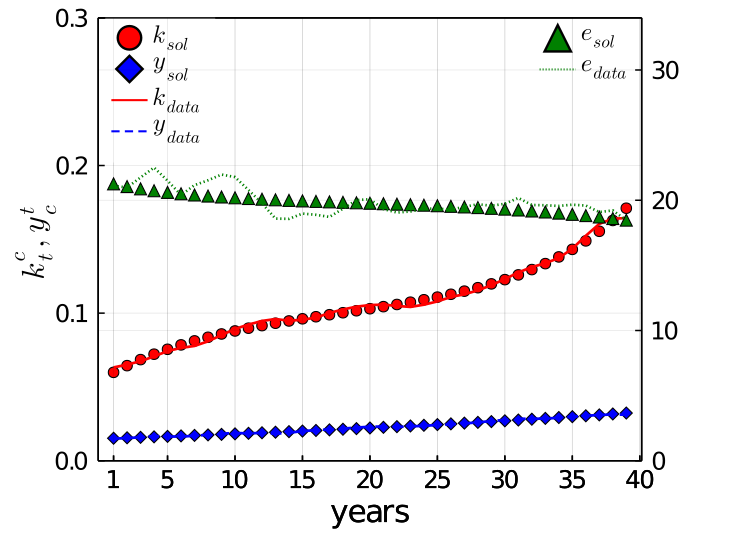

In [20]:
function plot_graphmodel1(nnpred,country,nntstepsfull,kdata,ydata,edata)
        upscale = 0.9 #8x upscaling in resolution
    fntsm = Plots.font("sans-serif", pointsize=round(12.0*upscale))
    fntlg = Plots.font("sans-serif", pointsize=round(16.0*upscale))
    default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
    default(size=(550*upscale,400*upscale)) #Plot canvas size
    default(dpi=150)
    
#     fctime = collect(Int(floor(size(nntstepsfull,1)*0.8))+1:1:size(nntstepsfull,1)) 
#             println(fctime)
#             println(nntstepsfull)
    plotkyenn12ic= scatter(xaxis=nntstepsfull,nnpred[:,1:2],
        label=[L"k_{sol}" L"y_{sol}"],color=[:red :blue],legend=(0.102,0.955),
        markershape=[:circle :diamond],markersize=4,
        ylabel=L"k^c_t,y^t_c",right_margin = 15Plots.mm)
            
    plot!(plotkyenn12ic,[kdata,ydata],label=[L"k_{data}" L"y_{data}"],linestyle=[:solid :dash],
        color=[:red :blue],ylim=(0,1.5.*round(maximum(kdata);sigdigits=1)),foreground_color_legend = nothing)

#     scatter!(plotkyenn12ic,fctime,nnpred[1:2,fctime]',
#         color=[:red :blue],markershape=[:circle :diamond], markersize=4,label=nothing) #markersize = 8 for predict

    pr = twinx()
    
    scatter!(pr,nntstepsfull,nnpred[:,3],label=L"e_{sol}",
        color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4, right_margin = 15Plots.mm,
        foreground_color_legend = nothing,background_color_legend = nothing)

# #     scatter!(pr,fctime,nnpred[3,fctime],
# #         label=L"e_{sol}",color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4,
# #         ylabel=L"e^t_c",right_margin = 15Plots.mm,
# #         foreground_color_legend = nothing,background_color_legend = nothing)
            
    plot!(pr,edata,label=L"e_{data}",color=:green,ylim=(0,1.7.*round(maximum(edata);sigdigits=1)),
                linestyle=:dot)
    
    xpts = collect(0:5:5*ceil(length(nntstepsfull)/5))
#     if xpts[end] != length(nntsteps)
#         push!(xpts,length(nntsteps))
        xpts[1]=1
#     end
    
   plot(plotkyenn12ic,xlabel = "years",xticks=xpts,box=:on,linewidth=2*upscale)
#     display(StatsPlots.plot(pl,xlabel = "Days post 21 March 2020",xticks=0:10:110,tickfont=12,
#         guidefont = 16,legendfontsize=12,legend=(0.1,0.92),
#         dpi=300,box=:on,linewidth=2*upscale))
# file_dir1 = @__DIR__
#     savefig(string(file_dir1,"/",country,"model1_maxdata"))
end

plot_graphmodel1(pred,"USA",range(1, 39, length = 39),kdata,ydata,edata)